In [98]:
# ================================================================
# Predicting Student Stress Level using Multinomial Logistic Regression
# SDG 3: Good Health and Well-Being
# ================================================================
# PROBLEM STATEMENT:
# Build a classification model to predict a student's stress level
# (Low, Medium, High) based on sleep duration, water intake,
# and daily screen time.
#
# Idea:
# Healthy habits reduce stress, while low sleep and long screen time
# increase stress. The dataset is simulated to capture realistic patterns.
# ================================================================

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

np.random.seed(42)


In [99]:
# ================================================================
# 2. SIMULATED DATA GENERATION
# ================================================================
N = 500

sleep_hours = np.random.uniform(4, 9, N)
water_liters = np.random.uniform(0.5, 3.5, N)
screen_time = np.random.uniform(2, 10, N)

# Stress score formula
stress_score = (10 - sleep_hours) * 0.4 \
               + (4 - water_liters) * 0.3 \
               + screen_time * 0.2 \
               + np.random.normal(0, 0.5, N)

# Convert continuous score → categories
stress_level = np.select(
    [stress_score < 4.5,
     (stress_score >= 4.5) & (stress_score < 6.5),
     stress_score >= 6.5],
    ['Low', 'Medium', 'High'],
    default='Medium'
)

df = pd.DataFrame({
    "Sleep_Hours": sleep_hours,
    "Water_Liters": water_liters,
    "Screen_Time_Hours": screen_time,
    "Stress_Level": stress_level
})

# Encode labels (Low=0, Medium=1, High=2)
le = LabelEncoder()
df["Stress_Level_Encoded"] = le.fit_transform(df["Stress_Level"])

df.head()


,Sleep_Hours,Water_Liters,Screen_Time_Hours,Stress_Level,Stress_Level_Encoded
0,5.872701,2.594485,3.481063,Low,0
1,8.753572,2.108289,6.335208,Low,0
2,7.659970,1.428583,8.983567,Low,0
3,6.993292,2.941385,7.857799,Low,0
4,4.780093,2.554194,8.452489,Medium,1


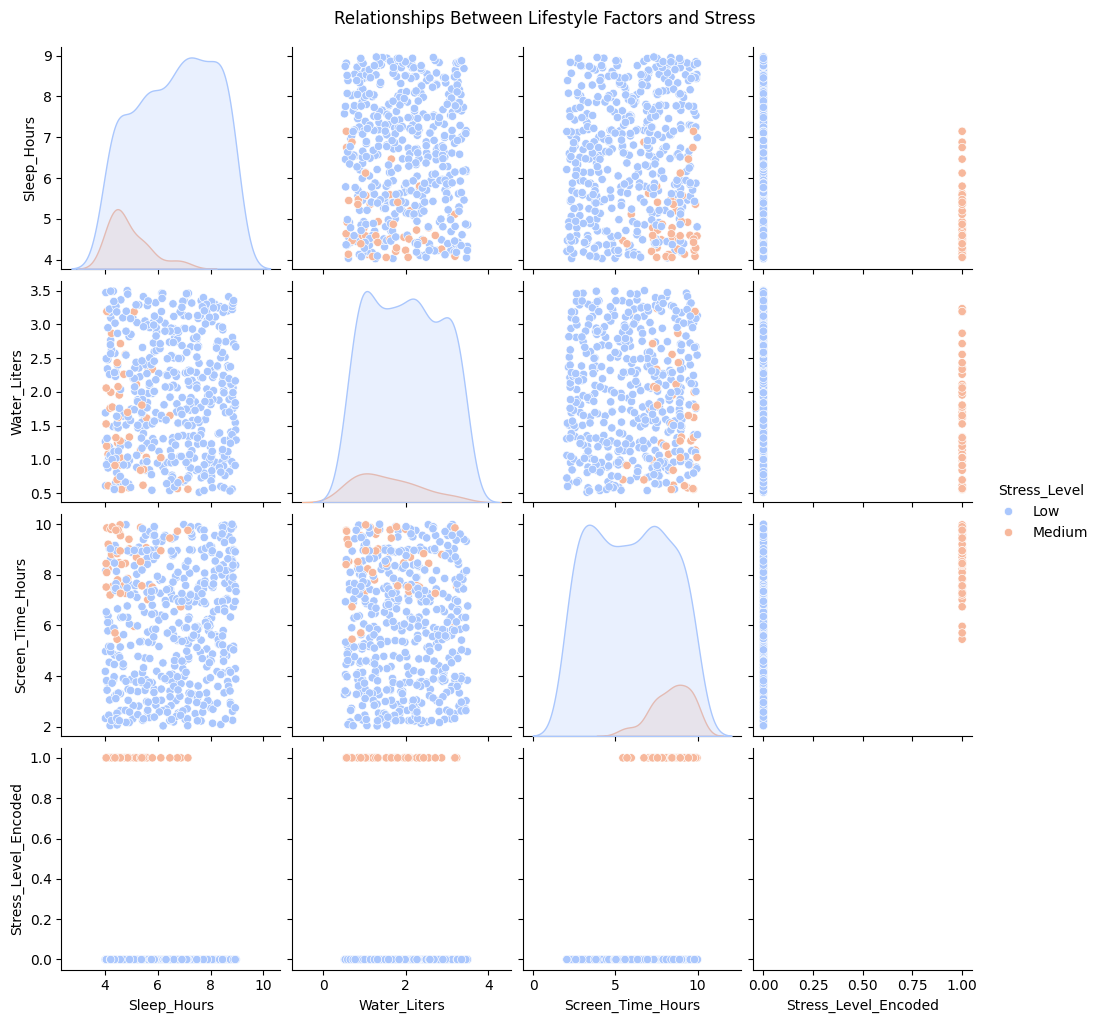

In [100]:
# ================================================================
# 3. VISUALIZATION: PAIRWISE RELATIONSHIPS
# ================================================================
sns.pairplot(df, hue="Stress_Level", palette="coolwarm")
plt.suptitle("Relationships Between Lifestyle Factors and Stress", y=1.02)
plt.show()


In [101]:
# ================================================================
# 4. FEATURE SELECTION AND DATA SPLIT
# ================================================================
X = df[["Sleep_Hours", "Water_Liters", "Screen_Time_Hours"]]
y = df["Stress_Level_Encoded"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [102]:
# ================================================================
# 5. TRAINING THE MULTINOMIAL LOGISTIC REGRESSION MODEL
# ================================================================
model = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

Model Accuracy: 92.0 %


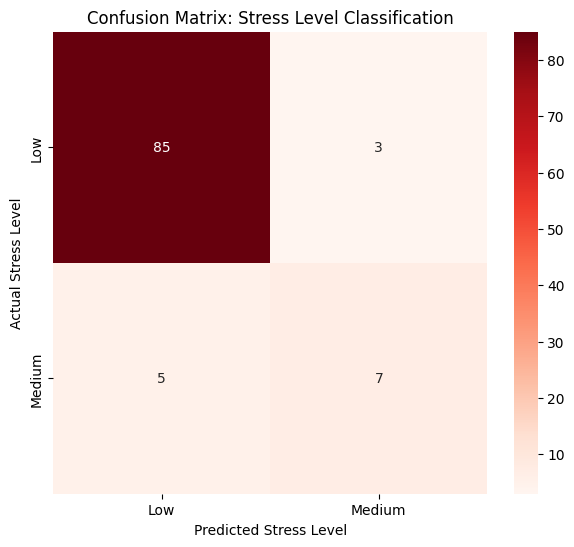

In [103]:
# ================================================================
# 6. MODEL EVALUATION
# ================================================================
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Model Accuracy:", round(accuracy * 100, 2), "%")

# Confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap="Reds")
plt.xlabel("Predicted Stress Level")
plt.ylabel("Actual Stress Level")
plt.title("Confusion Matrix: Stress Level Classification")
plt.show()


In [104]:
# ================================================================
# 7. FINAL TEST SCENARIOS
# ================================================================

# Scenario 1: Healthy lifestyle
scenario_low = np.array([[8.0, 3.0, 3.0]])

# Scenario 2: Unhealthy lifestyle
scenario_high = np.array([[4.0, 1.0, 8.0]])

pred_low = le.inverse_transform([model.predict(scenario_low)[0]])[0]
pred_high = le.inverse_transform([model.predict(scenario_high)[0]])[0]

print("Scenario 1 Prediction:", pred_low)
print("Scenario 2 Prediction:", pred_high)


Scenario 1 Prediction: Low
Scenario 2 Prediction: Medium


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
